# **Diplomado IA: Inteligencia Artificial I - Parte 2**. <br> Práctico 5: Recomendación de Contenido
---
---

**Profesores:**
- Julio Hurtado
- Felipe del Río

**Ayudante:**

---
---

# Agenda

Diplomado IA: Inteligencia Artificial I - Parte 2.  Práctico 5: Recomendación de Contenido

<!-- Agenda:
 * Problema
 * Preparación
 * Entrenamiento
 * Recomendación -->

Problema

Preparación

> Datos

> Instalación de librerias

Entrenamiento

> Dataset

> Funciones de Entrenamiento

> Funciones para mostrar resultados

> Modelo

> Entrenamiento

Recomendación

> Obtención de Descriptores

> Encontrar similares

> Recomendación

> Metricas de Comparación


# Objetivo del Laboratorio
 
Una parte importante para consolidar nuevos conocimientos es ponerlos en práctica. Después de algunas clases donde hemos visto varios métodos y algoritmos diferentes es bueno tomar una pausa para poder aplicar estos conocimientos. 

En este laboratorio los aplicaremos a un ejemplo más real que los que hemos visto en laboratorios pasados. El objetivo es corroborar el entendimiento de los conceptos claves, y que después podremos ser capaces de aplicarlos en diferentes problemas que nos podemos encontrar en la vida real.

No solo los modelos tienen que aprender.


## Problema
 
En este laboratorio aplicaremos los conocimientos vistos en las clases anteriores para entrenar un modelo que pueda recomendar contenido a un usuario de una red social, en base a sus interacciones pasadas.
 
En esta red social, una interacción está conformada por una imagen y un comentario, escrito por un usuario. El objetivo es generar una reacción en los usuarios, por lo que debemos recomendar o mostrarle imágenes de otros usuarios que tienen imágenes con textos similares. Por esta razón, tenemos que tener acceso tanto a las imágenes como al texto escrito por los usuarios para poder encontrar recomendaciones que causen un accionar en el usuario.


# Preparación
## Datos
 
Los datos son una de las partes más importantes al momento de entrenar modelos de aprendizaje. Si los datos no representan el problema que queremos resolver es muy difícil que nuestro modelo pueda encontrar una solución adecuada. De ahí viene la famosa expresión **"garbage in, garbage out"**.
 
En esta oportunidad utilizaremos un dataset abierto creado a partir de la red social **Pinterest**. Este dataset nos entrega imágenes y un comentario creado por un usuario. Por razones de *copyright* no tenemos acceso a las imágenes mismas, ya que esto trasgredería los términos y condiciones de esta red social. Para compartir las imagenes, esta base de datos comparte los descriptores de estas, encontrados con un modelo pre-entrenados sobre Imagenet.
 
Cada elemento de nuestro dataset está conformado por un par imagen-texto asociado a un usuario. Dado esto, definiremos como nuestra tarea, clasificar a qué usuario pertenece cada par imagen-texto del dataset.
 


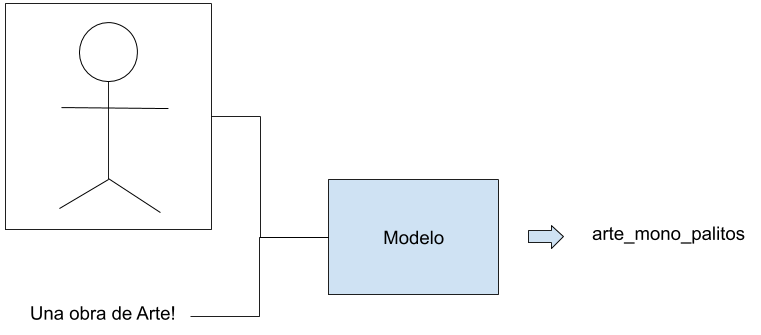

Para poder comenzar, lo primero que debemos hacer es descargar y descomprimir los archivos utilizando los siguientes comandos:

In [1]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fs4k2zc5j5-3.zip

--2020-12-08 18:56:21--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fs4k2zc5j5-3.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.56.120
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.56.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2160173792 (2.0G) [application/octet-stream]
Saving to: ‘fs4k2zc5j5-3.zip’

fs4k2zc5j5-3.zip    100%[===================>]   2.01G  21.8MB/s    in 95s     

2020-12-08 18:57:56 (21.6 MB/s) - ‘fs4k2zc5j5-3.zip’ saved [2160173792/2160173792]



In [2]:
!unzip fs4k2zc5j5-3.zip

Archive:  fs4k2zc5j5-3.zip
  inflating: text_train.txt          
  inflating: text_test.txt           
  inflating: imag_val.txt            
  inflating: val_test_users.txt      
  inflating: images.rar              
  inflating: imag_train.txt          
  inflating: text_val.txt            
  inflating: train_users.txt         
  inflating: imag_test.txt           


In [3]:
!wget https://data.mendeley.com/public-files/datasets/fs4k2zc5j5/files/cc4e3cb0-f2cf-4f4a-9395-a8215dc68b45/file_downloaded
!rm imag_train.txt
!mv file_downloaded imag_train.txt

--2020-12-08 18:58:53--  https://data.mendeley.com/public-files/datasets/fs4k2zc5j5/files/cc4e3cb0-f2cf-4f4a-9395-a8215dc68b45/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/96781484-1d06-4610-9c59-bb918db16f53 [following]
--2020-12-08 18:58:54--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/96781484-1d06-4610-9c59-bb918db16f53
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.101.152
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.101.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1699873240 (1.6G) [text/p

Podemos verificar que tenemos todos los datos en nuestro Colab es revisar el navegador de archivos que se encuentra en la izquierda de nuestro navegador.

## Actividad 1

1- Asuma el contexto actual, usted trabaja en una empresa que tiene una red social muy similar a Facebook y quiere recomendar contenido a los usuarios. Responda las siguientes preguntas:

*   ¿Qué información recolectaría para poder entrenar su modelo?  
*   ¿Cómo usaría la información recolectada?
*   ¿Existe información externa (que no puede ser recolectada por su empresa) que pueda ser útil para mejorar el rendimiento del modelo? Si su respuesta es afirmativa, de un ejemplo.


**Respuesta**

* La informacion que recolectaria es a)caracteristicas del usuario (edad, genero, localidad, etc.), b) el tipo de contenido que el usuario hace click, c) el contenido que el usuario evita, d) el tiempo que el usuario pasa en el sitio web

* Usaria la informacion para dar mejores recomendaciones que le gustasen al usuario, que son consistentes con el contenido que el usuario ha hecho click en el pasado

* Si hay informacion externa que puede ser util. Por ejemplo, Google y Facebook venden informacion de los usuarios que es util para crear un mejor perfil del usuario y de las cosas que le gusta. De esta manera uno puede crear una mejor estrategia de marketing para mejorar la oferta al usuario

## Instalación de librerías

Al igual que el jueves pasado, utilizaremos la librería `transformers` que nos facilita la utilización de modelos de texto como Bert, ademas de tokenizadores correspondientes.





In [4]:
!pip install -q transformers==3.5.1

     |████████████████████████████████| 1.3MB 9.5MB/s 
     |████████████████████████████████| 1.1MB 16.4MB/s 
     |████████████████████████████████| 2.9MB 44.5MB/s 
     |████████████████████████████████| 890kB 53.9MB/s 


# Entrenamiento

In [5]:
import numpy as np
import pandas as pd
import os
from random import sample

import torch
from torch.utils.data import Dataset, DataLoader

import transformers
from transformers import BertTokenizer, BertModel
from transformers import PretrainedConfig

## Dataset

Creamos la clase `ContentRecommender` y su objetivo es cargar los datos y entregarlos de tal forma que sea aceptado por la clase `DataLoader` de PyTorch. 

In [6]:
class ContentRecommender(Dataset):
    def __init__(self, root_dir, data_set='train', num_classes=-1, sub_classes=None, tokenizer=None, transform=None, amount_triplet=3):
        if data_set == 'train':
            self.img_data = pd.read_csv(os.path.join(root_dir,'./imag_train.txt'), header=None).values
            self.txt_data = self.read_file_text(os.path.join(root_dir,'./text_train.txt'))
            self.targets = self.read_file_id(os.path.join(root_dir,'./train_users.txt'))
        elif data_set == 'val':
            self.img_data = pd.read_csv(os.path.join(root_dir,'./imag_val.txt'), header=None).values 
            self.txt_data = self.read_file_text(os.path.join(root_dir,'./text_val.txt'))
            self.targets = self.read_file_id(os.path.join(root_dir,'./val_test_users.txt'))
        elif data_set == 'test':
            self.img_data = pd.read_csv(os.path.join(root_dir,'./imag_test.txt'), header=None).values 
            self.txt_data = self.read_file_text(os.path.join(root_dir,'./text_test.txt'))
            self.targets = self.read_file_id(os.path.join(root_dir,'./val_test_users.txt'))
        else:
            raise('data_Set must be some of [train, val, test]')

        self.transform = transform
        self.tokenizer = tokenizer
        self.amount_triplet = amount_triplet

        self.sub_classes = None
        if num_classes != -1 or sub_classes:
            self.sub_set(num_classes, sub_classes)

        self.size_dataset()

    def sub_set(self, num_classes, sub_classes):
        if sub_classes is None:
            sample_cls = sample(list(set(self.targets)),num_classes)
        else:
            sample_cls = sub_classes

        d_img = []
        d_txt = []
        t = []
        for i,cls in enumerate(sample_cls):
            sample_data = list((torch.tensor(self.targets) == cls).nonzero())

            d_img.extend(self.img_data[sample_data])
            d_txt.extend([ self.txt_data[elem] for elem in sample_data ])
            t.extend([int(i)]*len(sample_data))
        
        self.sub_classes = sample_cls
        self.img_data = torch.tensor(d_img)
        self.txt_data = d_txt
        self.targets = t

    def read_file_id(self, name_file):
        data = []
        with open(name_file) as f: 
            for line in f: 
                data.append(int(line.strip()))
        return data

    def read_file_text(self, name_file):
        data = []
        with open(name_file) as f: 
            for line in f: 
                data.append(line.strip())
        return data

    def __len__(self):
        return len(self.txt_data)

    def __getitem__(self, idx):
        comment_text = str(self.txt_data[idx])
        comment_text = " ".join(comment_text.split())

        inputs_text = self.tokenizer.encode_plus(
                    comment_text,
                    None,
                    add_special_tokens=True,
                    max_length=100,
                    pad_to_max_length=True,
                    return_token_type_ids=True,
                    truncation=True,
                )

        return {
            'text_ids': torch.tensor(inputs_text['input_ids'], dtype=torch.long),
            'text_mask': torch.tensor(inputs_text['attention_mask'], dtype=torch.long),
            'text_token_type_ids': torch.tensor(inputs_text['token_type_ids'], dtype=torch.long),
            'targets': torch.tensor(self.targets[idx], dtype=torch.float),
            'img_data': self.img_data[idx],
            'idx_data': idx
            }

    def size_dataset(self):
        print('We have {} Image with {} features with {} texts. \
                The amount of different users is {}'.format(self.img_data.shape[0],
                                                            self.img_data.shape[1],
                                                            len(self.txt_data),
                                                            len(set(self.targets))))

In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
num_classes = 10

trainset = ContentRecommender('./', 'train', num_classes=num_classes, tokenizer=tokenizer)
testset = ContentRecommender('./', 'test', sub_classes=trainset.sub_classes, tokenizer=tokenizer)

batch_size = 16

loaders = {
    'train': DataLoader(trainset, batch_size=batch_size, shuffle=True),
    'test': DataLoader(testset, batch_size=batch_size, shuffle=False),
    'val': DataLoader(testset, batch_size=batch_size, shuffle=False),
}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)


We have 4000 Image with 4096 features with 4000 texts.                 The amount of different users is 10
We have 1000 Image with 4096 features with 1000 texts.                 The amount of different users is 10


AlexNet:

<figure>
<center>
<img src='https://www.mdpi.com/remotesensing/remotesensing-09-00848/article_deploy/html/images/remotesensing-09-00848-g001.png' height="500" />
<figcaption>Modelo Alexnet</figcaption>
</center>

</figure>

In [8]:
idx = torch.randint(0, len(trainset.targets), (1,1)).item()
print("Un ejemplo del dataset:")
print(trainset.txt_data[idx])
print(trainset.img_data[idx])
print(trainset.targets[idx])

idxs_user = list((torch.tensor(trainset.targets) == trainset.targets[idx]).nonzero())
for id in idxs_user[:5]:
    print(trainset.txt_data[id])


Un ejemplo del dataset:
marilyn monroe
tensor([-4.8970,  2.3125, -5.0465,  ..., -1.8743,  5.7539, -4.5512],
       dtype=torch.float64)
6
plus size pretty
marilyn monroe photographed by richard avedon
greatest pre wedding picture idea
marilyn
bouquet charms for those who are not present


## Funciones de Entrenamiento

Crearemos varias funciones que nos ayudarán el entrenaminto de modelos reiteradas veces en este práctico. Les recomendamos que traten de entender cada una de estas funciones pues podrán reforzar conocimientos que ya han aprendido en el diplomado hasta ahora.

In [9]:
def run_epoch(phase, model, loader, criterion, optimizer=None):
    n_batches = len(loader)
    if phase == 'train':
        model.train()
    elif phase == 'val' or 'test':
        model.eval()
        
    cum_loss = 0.0
    cum_acc = 0.0
    for n_batch, data in enumerate(loader, start=1):
        if phase == 'train': # Limpiamos los gradientes solo al entrenar
            optimizer.zero_grad()

        ids = data['text_ids'].to(device, dtype=torch.long)
        mask = data['text_mask'].to(device, dtype=torch.long)
        token_type_ids = data['text_token_type_ids'].to(device, dtype=torch.long)
        img = data['img_data'].to(device, dtype=torch.float)
        targets = data['targets'].to(device, dtype=torch.long)
        
        result = model(ids, mask, token_type_ids, img) # Aquí se ejecuta nuestro modelo

        loss = criterion(result, targets) # Cálculamos la pérdida
        cum_loss += loss.item()
        _, preds = torch.max(result.data, 1)

        # accuracy = calculate_metrics(targets, preds)
        cum_acc += torch.sum(preds == targets.data)
        if phase == 'train':
            loss.backward() # Hacemos backpropagation solo en train
            optimizer.step() # Actualizamos parámetros solo en train

        current_cum_loss = cum_loss / n_batch
        current_cum_acc = 100 * cum_acc / (n_batch * batch_size) 

        print(f'\r{phase.upper()}-Batch {n_batch}/{n_batches} '
              f'Loss: {current_cum_loss:.4f} '
              f'Acc: {current_cum_acc:.2f}% ', end='')
    
    epoch_loss = float(cum_loss / n_batch)
    epoch_acc = float(100 * cum_acc / (n_batch * batch_size))

    return epoch_loss, epoch_acc

def run_training(model, loaders, optimizer, criterion, n_epochs, scheduler):
    phases = ['train', 'val']
    history = {
        'train': {'loss': [], 'acc': []},
        'val': {'loss': [], 'acc': []}
    }

    print(f"Validating model before training")
    with torch.no_grad():
        val_loss, val_acc = run_epoch('val', model, loaders['val'], criterion)
    print()

    history['val']['loss'].append(val_loss)
    history['val']['acc'].append(val_acc)
    for epoch in range(1, n_epochs + 1):
        print(f"Epoch N°{epoch}")
        for phase in phases:
            epoch_loss, epoch_acc = run_epoch(phase, model, loaders[phase], criterion, optimizer=optimizer)
            # Registramos las pérdidas y accuracy por época, por fase
            history[phase]['loss'].append(epoch_loss)
            history[phase]['acc'].append(epoch_acc)
            print("")
        
        scheduler.step(history['val']['loss'][-1])

    return history

## Funciones para mostrar resultados

Definamos también algunas funciones que nos ayudarán a visualizar el entrenamiento y sus resultados de mejor forma.

In [10]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sklearn.metrics

def graph_metrics(metricas_test, metricas_train, title=''):
    fig, ax = plt.subplots()
    plt.style.use('seaborn-white')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))
    plt.plot(range(1, int(len(metricas_train) + 1)), metricas_train, marker='o')
    plt.plot(range(int(len(metricas_test))), metricas_test, marker='o')
    plt.legend(['Train', 'Val'])
    plt.title(title)
    plt.show()


def graph_training_metrics(history):
    for metric in ['loss', 'acc']:
        title = f'{metric.capitalize()} vs N° Épocas'
        graph_metrics(history['val'][metric], history['train'][metric], title=title)


def print_report(train_history):
    graph_training_metrics(train_history)

    train_loss = train_history['train']['loss'][-1]
    train_acc = train_history['train']['acc'][-1]
    val_loss = train_history['val']['loss'][-1]
    val_acc = train_history['val']['acc'][-1]
    print(f'Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.2f}%')

## Modelo

La particularidad de este modelo es que debe unir dos representaciones (una imagen y otra texto) para realizar la clasificación.

En el caso de la imagen, la representación nos la entrega el dataset que estamos utilizando. Esta viene dada por un vector de características, *feature vector*, extraída por un modelo convolucional pre-entrenado.

Para el texto, utilizamos BERT, un modelo pre-entrenado del tipo transformer que se utiliza para texto. Este nos permitirá aprovechar este pre-entrenamiento para encontrar una representación mas rica que entrenando un modelo simple.

Ambas representaciones son pasadas por capas *fully-connected* para disminuir su dimensionalidad, luego concatenadas y pasadas por una nueva capa *fully-connected*. Por último, esta representación es pasada por el clasificador para obtener la predicción.

In [11]:
import torch

class ModelClass(torch.nn.Module):
    def __init__(self, pretrained=True, num_classes=117):
        super(ModelClass, self).__init__()
        if pretrained:
            self.l1_txt = transformers.BertModel.from_pretrained('bert-base-uncased')
        else:
            config = PretrainedConfig.from_pretrained('bert-base-uncased')
            self.l1_txt = transformers.BertModel(config)

        self.l2_txt = torch.nn.Linear(768, 64)
        self.l1_img = torch.nn.Linear(4096, 64)
        self.l1_join = torch.nn.Linear(64+64, 32)
        self.drop = torch.nn.Dropout(0.3)
        self.relu = torch.nn.ReLU(inplace=True)
        self.l2_join = torch.nn.Linear(32, num_classes)
    
    def forward(self, ids, mask, token_type_ids, img_data, features=False):
        _, output_text = self.l1_txt(ids, attention_mask=mask, token_type_ids=token_type_ids)
        output_text = self.l2_txt(output_text)
        output_img = self.l1_img(img_data)

        output_text = self.drop(self.relu(output_text))
        output_img = self.drop(self.relu(output_img))
        output = torch.cat([output_text, output_img], dim=1)

        output = self.l1_join(torch.cat([output_text, output_img], dim=1))
        output = self.drop(self.relu(output))
        if features:
            return output
        output = self.l2_join(output)
        return output

### Baseline

Comparar el funcionamiento de nuestro modelo es fundamental para ver si lo que estamos haciendo funciona bien o mal. En esta ocasión utilizaremos un segundo modelo para poder compararnos. En este solo le entregamos solo la información de las imágenes a este segundo modelo para realizar la recomendación, esperando que este sea peor que el modelo completo.

In [12]:
class ModelClassImage(torch.nn.Module):
    def __init__(self, pretrained=True, num_classes=117):
        super(ModelClassImage, self).__init__()

        self.l1_img = torch.nn.Linear(4096, 64)
        self.drop = torch.nn.Dropout(0.3)
        self.relu = torch.nn.ReLU(inplace=True)
        self.l2_img = torch.nn.Linear(64, num_classes)

    def forward(self, ids, mask, token_type_ids, img_data, features=False):
        output = self.l1_img(img_data)
        output = self.drop(self.relu(output))
        if features:
            return output
        output = self.l2_img(output)
        return output

## Entrenamiento

Al momento del entrenamiento debemos seleccionar una función de perdida apropiada y un algoritmo de optimización que se comporte bien para este problema.

En este caso al ser un problema de clasificación podemos utilizar la función de pérdida *Cross Entropy*, muy utilizada para este tipo de problemas.

Una alternativa para la función de pérdida podría ser la función *Triplet Loss*, esta busca que el modelo genere representaciones cercanas para elementos de un mismo usuario y genere representaciones más distantes para elementos de usuarios distintos. Un  problema con esa alternativa, es que necesitamos generar triples para el entrenamiento (de ahí su nombre) con elementos de ancla, positivo y negativo para cada iteración en entrenamiento, causando que el proceso sea más complejo, en tiempo y recursos.

Tal como mencionamos en la clase de optimizadores, uno de los algoritmos de optimización en deep learning mas completos y utilizados es Adam, que tiene los beneficios de momentum y la normalización, generando learning rate locales para cada parametros.

Además utilizamos un scheduler en base a la perdida de nuestro set de validación.




Validating model before training
VAL-Batch 1/63 Loss: 2.3757 Acc: 0.00% 

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


VAL-Batch 63/63 Loss: 2.3270 Acc: 7.94% 
Epoch N°1
TRAIN-Batch 250/250 Loss: 2.0864 Acc: 23.68% 
VAL-Batch 63/63 Loss: 1.7938 Acc: 43.65% 
Epoch N°2
TRAIN-Batch 250/250 Loss: 1.8159 Acc: 36.18% 
VAL-Batch 63/63 Loss: 1.6086 Acc: 49.11% 
Epoch N°3
TRAIN-Batch 250/250 Loss: 1.6502 Acc: 43.23% 
VAL-Batch 63/63 Loss: 1.4294 Acc: 51.88% 
Epoch N°4
TRAIN-Batch 250/250 Loss: 1.5749 Acc: 45.18% 
VAL-Batch 63/63 Loss: 1.3699 Acc: 54.96% 
Epoch N°5
TRAIN-Batch 250/250 Loss: 1.5036 Acc: 48.65% 
VAL-Batch 63/63 Loss: 1.2982 Acc: 57.14% 
Epoch N°6
TRAIN-Batch 250/250 Loss: 1.4263 Acc: 51.28% 
VAL-Batch 63/63 Loss: 1.2945 Acc: 56.55% 
Epoch N°7
TRAIN-Batch 250/250 Loss: 1.3682 Acc: 52.88% 
VAL-Batch 63/63 Loss: 1.2493 Acc: 57.84% 
Epoch N°8
TRAIN-Batch 250/250 Loss: 1.3270 Acc: 55.00% 
VAL-Batch 63/63 Loss: 1.2118 Acc: 58.23% 
Epoch N°9
TRAIN-Batch 250/250 Loss: 1.2982 Acc: 55.10% 
VAL-Batch 63/63 Loss: 1.1909 Acc: 59.42% 
Epoch N°10
TRAIN-Batch 250/250 Loss: 1.2540 Acc: 56.93% 
VAL-Batch 63/63 Loss

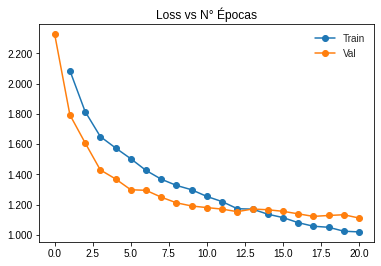

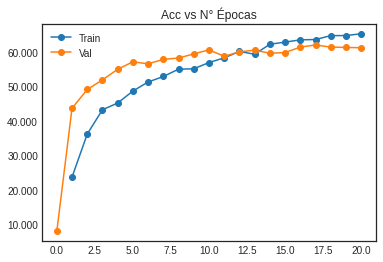

Train Loss: 1.0193 - Train Acc: 65.28%
Val Loss: 1.1111 - Val Acc: 61.21%


In [13]:
from torch import optim
from torch.optim import lr_scheduler
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ModelClass(pretrained=True, num_classes=num_classes)
model.to(device)

criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-4) #1e-5
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer)

epochs = 20
history = run_training(model, loaders, optimizer, criterion, epochs, scheduler)

print_report(history)

Validating model before training
VAL-Batch 29/63 Loss: 2.5746 Acc: 8.41% 

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


VAL-Batch 63/63 Loss: 2.6949 Acc: 10.22% 
Epoch N°1
TRAIN-Batch 250/250 Loss: 1.8005 Acc: 37.83% 
VAL-Batch 63/63 Loss: 1.4047 Acc: 50.50% 
Epoch N°2
TRAIN-Batch 250/250 Loss: 1.4181 Acc: 51.08% 
VAL-Batch 63/63 Loss: 1.2354 Acc: 58.23% 
Epoch N°3
TRAIN-Batch 250/250 Loss: 1.3080 Acc: 54.58% 
VAL-Batch 63/63 Loss: 1.2254 Acc: 56.75% 
Epoch N°4
TRAIN-Batch 250/250 Loss: 1.1983 Acc: 57.73% 
VAL-Batch 63/63 Loss: 1.1891 Acc: 59.23% 
Epoch N°5
TRAIN-Batch 250/250 Loss: 1.1281 Acc: 60.95% 
VAL-Batch 63/63 Loss: 1.1661 Acc: 58.83% 
Epoch N°6
TRAIN-Batch 250/250 Loss: 1.0595 Acc: 63.45% 
VAL-Batch 63/63 Loss: 1.1493 Acc: 60.62% 
Epoch N°7
TRAIN-Batch 250/250 Loss: 0.9955 Acc: 65.68% 
VAL-Batch 63/63 Loss: 1.1058 Acc: 61.41% 
Epoch N°8
TRAIN-Batch 250/250 Loss: 0.9475 Acc: 67.28% 
VAL-Batch 63/63 Loss: 1.1453 Acc: 59.62% 
Epoch N°9
TRAIN-Batch 250/250 Loss: 0.9346 Acc: 67.23% 
VAL-Batch 63/63 Loss: 1.1728 Acc: 59.72% 
Epoch N°10
TRAIN-Batch 250/250 Loss: 0.8714 Acc: 69.43% 
VAL-Batch 63/63 Los

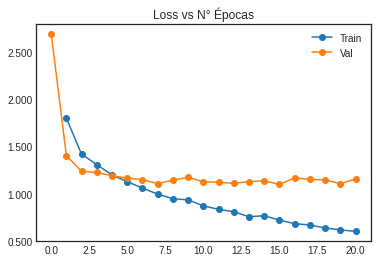

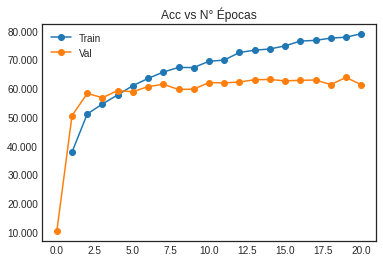

Train Loss: 0.6006 - Train Acc: 79.00%
Val Loss: 1.1554 - Val Acc: 61.31%


In [14]:
from torch import optim
from torch.optim import lr_scheduler
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_img = ModelClassImage(pretrained=True, num_classes=num_classes)
model_img.to(device)

criterion = CrossEntropyLoss()
optimizer = Adam(model_img.parameters(), lr=1e-4) #1e-5
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer)

epochs = 20
history = run_training(model_img, loaders, optimizer, criterion, epochs, scheduler)

print_report(history)

## Actividad 2
1 - Con respecto a los conocimientos adquiridos hasta el momento:
- Enumere 2 limitaciones de nuestro modelo. Sugiera una mejora en base a estas limitaciones. 

- En base a los temas vistos hasta ahora en el diplomado, sugiera una mejora que podría hacerle a este modelo.

- Enumere dos formas que se le ocurran de realizar data augmentation con estos datos.


**Resultado**

* Dos limitaciones: Una es que, como las imagenes vienen representadas como un feature vector en vez de ser imagenes verdaderas, no podemos usar data augmentation para tener un training set mas grande. Otra limitacion es que tampoco podemos usar data augmentation en el texto. Una manera de mejorar estas limitaciones es obtener más imagenes con textos para tener un training set mas grande.

* Una sugerencia de Mejora a este modelo: En el modelo usamos Bert para hacer transfer learning y fine tuning, y así obtener una mejora en los resultados. También ayudaría hacer transfer learning en un modelo para el análisis de las imagenes.

* Dos formas de hacer data augmentation: Una manera que se me ocurre es escribir un segundo texto para describir cada imagen (o multiples textos). Similarmente, tener dos o mas imagenes que corresponden a cada texto. De esta manera, es una forma de forzar al modelo a que sea más robusto en su descripción de imagenes. Otra manera de hacer data augmentation podria ser trabajar con imagenes en vez de feature vector, y luego usar los metodos de data augmentation como rotacion, flip, noise, u otros. 

# Recomendación

Para recomendar contenido a usuarios nos vamos a basar en que usuarios prefieren contenido similar al que ya han interactuado antes. Es decir, imagenes y texto similares a los que a comentado pueden incentivar a generar una nueva interacción.

Una forma que tenemos de verificar si un par imagen-texto es similar a otro es mediante los descriptores que estos tipos de modelos generan para poder realizar la clasificación.



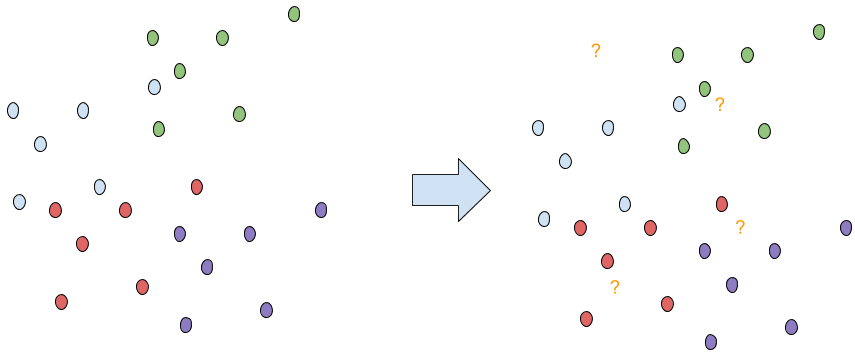

## Obtención de Descriptores

Para obtener una representación que tenga información tanto de la imagen como del texto, utilizamos el parámetro `features` de nuestro modelo. Con esto, en vez de devovlernos las predicciondes del modelo, nos entrega un descriptor de nuestro par imagen-texto.

La motivación de esto es la misma que la vista el jueves pasado, donde utilizan modelos pre-entrenados para encontrar descriptores de imagenes y luego entrenar un clasificador con estos. La diferencia es que aquí no los vamos a utilizar para entrenar un clasificador sino que lo vamos a utilizar para encontrar distancias entre los diferentes elementos de nuestro dataset.



In [15]:
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")
model.to(device)

test_f = np.zeros((len(testset), 32), dtype=np.float32)
model.eval()
for i, b in enumerate(testset):
    ids = b['text_ids'].to(device, dtype=torch.long).unsqueeze(0)
    mask = b['text_mask'].to(device, dtype=torch.long).unsqueeze(0)
    token_type_ids = b['text_token_type_ids'].to(device, dtype=torch.long).unsqueeze(0)
    img = b['img_data'].to(device, dtype=torch.float).unsqueeze(0)
    targets = b['targets'].to(device, dtype=torch.long).unsqueeze(0)
        
    test_f[i] = model(ids, mask, token_type_ids, img, features=True).detach().numpy()

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [16]:
# Hacer lo mismo que en `f` pero con los datos de train

train_f = np.zeros((len(trainset), 32), dtype=np.float16)
model.eval()
for i, b in enumerate(trainset):
    ids = b['text_ids'].to(device, dtype=torch.long).unsqueeze(0)
    mask = b['text_mask'].to(device, dtype=torch.long).unsqueeze(0)
    token_type_ids = b['text_token_type_ids'].to(device, dtype=torch.long).unsqueeze(0)
    img = b['img_data'].to(device, dtype=torch.float).unsqueeze(0)
    targets = b['targets'].to(device, dtype=torch.long).unsqueeze(0)
        
    train_f[i] = model(ids, mask, token_type_ids, img, features=True).half().detach().numpy()

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## Encontrar similares

Una vez que tenemos los descriptores tanto del set de entrenamiento como del set de test podemos comenzar a calcular la distancia de los nuevos datos (test) con respecto a los utilizado durante el entrenamiento (train).

La intuicion de esto es que queremos recomendar los nuevos elementos a usuarios con gustos similares, y para esto nos basamos en alguna metrica de distancia entre ambos descriptores. Al encontrar la distancia menor de un elementos con otro sabemos a que usuario recomendarle esta nueva imagen, ya que conocemos el usuario que escribio el comentario en esa imagen en los datos de entrenamiento.

In [17]:
from sklearn.metrics import pairwise_distances
import heapq

def find_similar_images(embedding, query_id=None, metrics=('euclidean',), topk=5):
    assert len(metrics) > 0
    assert topk <= 30 # to avoid requesting too many images
    n = embedding.shape[0]
    if query_id is None:
        query_id = np.random.randint(n)
    results = {}
    # --- show retrieved images for each metric
    for metric in metrics:
        #print('-------- retrieved with metric = %s -----' % metric)
        distances = pairwise_distances(embedding[query_id].reshape(1,-1), embedding, metric=metric)
        heap = []
        for i in range(n):
            if i == query_id:
                continue
            if len(heap) < topk:
                heapq.heappush(heap, (-distances[0][i], i))
            else:
                heapq.heappushpop(heap, (-distances[0][i], i))
        heap.sort(reverse=True)
        results[metric] = tuple(zip(*heap))
        results[metric] = (list(results[metric][1]), [-dist for dist in results[metric][0]])
    return results

In [18]:
find_similar_images(test_f, metrics=('cosine','euclidean'), query_id=2, topk=10)

{'cosine': ([16, 88, 414, 94, 266, 263, 86, 204, 298, 224],
  [0.032414794,
   0.037415028,
   0.04376,
   0.048715472,
   0.062547326,
   0.06333506,
   0.064005315,
   0.070311785,
   0.08052051,
   0.08052051]),
 'euclidean': ([16, 94, 263, 204, 25, 298, 224, 296, 266, 37],
  [3.8692539,
   5.08054,
   5.3484907,
   5.5379686,
   5.717491,
   5.8308644,
   5.8308644,
   5.9669523,
   6.029956,
   6.13256])}

## Recomendación

Tal como se menciono en la sección anterior, una vez con las distancias entre los vectores podemos recomendar nuevo contenido a un usuario considerando las distancias minimas entre estos.

In [19]:
targets = np.array(testset.targets)
n_targets = len(set(targets))

In [20]:
# Creo dicts con user_id => feats (los features concatenados de todos los items del usuario en train)
# y lo transformo a un np.array (user_repr)
from collections import defaultdict

user_dict = {}
for user_id, features in zip(trainset.targets, train_f):
    if not user_id in user_dict:
        user_dict[user_id] = []
    user_dict[user_id].append(features)

for user_id in user_dict:
    user_dict[user_id] = np.array(user_dict[user_id])

user_repr = np.array([user_dict[user_id] for user_id in range(n_targets)])

In [21]:
# Calculo los scores para cada imágen en test con respecto a un usuario
metric = 'cosine'

n_users, n_images, _ = user_repr.shape
user_repr = user_repr.reshape(-1, 32)
dists = pairwise_distances(user_repr, test_f, metric=metric)
dists = dists.reshape(n_users, n_images, -1)
scores = dists.min(axis=1)

print(scores.shape)

(10, 1000)


In [22]:
# Lista de recomendación
k = 10
recommendation_list = np.argpartition(scores, k)
recommendation_list = recommendation_list[:,:k]

En esta lista muestra el id de los elementos de nuestro base de datos (imagen-texto) que le podria interesar a 10 usuarios diferentes, en base a las menores distancias de los elementos que conocemos del usuario con cada uno de los nuevos elementos que nos llegaron.

In [23]:
recommendation_list

array([[ 52,  86,   2,   3, 238,   5,  37, 252, 282,  65],
       [190, 130, 113, 106, 154, 176, 117, 139, 195, 138],
       [230, 270, 265, 260, 237, 284, 279, 280, 252, 220],
       [377, 576, 392, 320, 386, 375, 382, 323, 330, 548],
       [407, 410, 462, 440, 418, 408, 449, 498, 454, 753],
       [569, 599, 542, 643, 348, 258, 968, 832, 762, 573],
       [714, 786, 781, 680, 696, 720, 774, 908, 668, 722],
       [700, 765, 732, 733, 714, 756, 702, 734, 786, 763],
       [892, 888, 821, 873, 810, 803, 899, 846, 814, 818],
       [909, 999, 991, 956, 902, 994, 973, 965, 904, 934]])

## Métricas de Comparación

Tal como vimos en clases, existen varias métricas que se pueden utilizar para comprobar el correcto funcionamiento de nuestro modelo de recomendación. 

Las primeras métricas son *Precision* y *Recall*, que nos entregan la cantidad de datos correctos recuperamos y estamos recuperando, respectivamente. La figura siguiente es buena para entender estos conceptos.

<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg' height="500" />
<figcaption>Cálculo de precision y recall.</figcaption>
</center>

</figure>

La *Precision* nos dice la cantidad de elementos correctos que recuperamos en nuestro set, es decir, de los elementos que recomendamos al usuario, cuantos de estos efectivamente pueden gustarle a la persona.

> $Precision = \frac{True Positive}{True Positive + False Positive} $

Por otro lado, el *Recall* nos indica la cantidad de elementos relevantes que le estamos mostrando al usuario del total de elementos relevantes que sabemos le pueden gustar. Es decir, del total de elementos relevantes para el usuario que tenemos en nuestra base de datos, cuantos de estos los estamos mostrando en nuestra recomendación. 

> $Recall = \frac{True Positive}{True Positive + False Negative} $

Una métrica particular para sistemas recomendadores es Normalized Discounted Cumulative Gain (nDCG), que busca entregar una metrica con respecto al ránking que le estamos entregando. La intuición es que los elementos mas relevantes debería aparecer primero en nuestro ránking para ir disminuyendo en relevancia.

> $nDCG_p = \frac{\sum_{i=1}^p\frac{2^{rel_i}-1}{log_2(i+1)}}{\sum_{i=1}^{REL_p}\frac{2^{rel_i}-1}{log_2(i+1)}} = \frac{DCG_p}{IDCG_p}$

En nuestro caso, todos los elementos que queremos recomendarle al usuario tienen igual relevancia (1) y los otros tienen relevancia cero (0).

In [24]:
from sklearn.metrics import ndcg_score

def ndcg(scores, targets, k):
    relevance = np.zeros((targets.size, targets.max() + 1))
    relevance[np.arange(targets.size), targets] = 1
    relevance = relevance.T

    return ndcg_score(relevance, scores, k=k)

def pr_at_k(scores, targets, k):
    recs = np.argpartition(scores, k)
    recs = recs[:,:k]
    n_targets = len(set(targets))
    rels = np.array([np.where(targets == user_id)[0] for user_id in range(n_targets)])

    precision = []
    recall = []
    for user_id, (recommended, relevants) in enumerate(zip(recs, rels)):
        recommended = recommended[:k]
        recommended = set(recommended)
        relevants = set(relevants)
        p = len(recommended & relevants) / len(recommended)
        r = len(recommended & relevants) / len(relevants)
        precision.append(p)
        recall.append(r)

    return np.mean(p), np.mean(r) # P@k, R@k

In [25]:
pr, rec = pr_at_k(scores, targets, k=400)
obtained_ndcg = ndcg(scores, targets, k=400)
print(f'P={pr}')
print(f'R={rec}')
print(f'nDCG={obtained_ndcg}')

P=0.2475
R=0.99
nDCG=0.04541302310358587


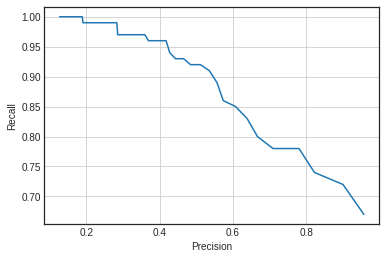

In [26]:
pr_all = []
rec_all = []
ndcg_all = []
for i in range(70,800, 10):
    pr, rec = pr_at_k(scores, targets, k=i)
    pr_all.append(pr)
    rec_all.append(rec)
    o_ndcg = ndcg(scores, targets, k=i)
    ndcg_all.append(o_ndcg)

fig, ax = plt.subplots()
ax.plot(pr_all, rec_all)

ax.set(xlabel='Precision', ylabel='Recall')
ax.grid()

plt.show()

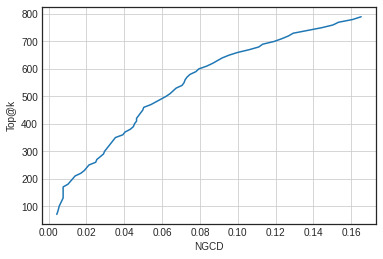

In [27]:
fig, ax = plt.subplots()
ax.plot(ndcg_all, list(range(70, 800, 10)))

ax.set(xlabel='NGCD', ylabel='Top@k')
ax.grid()

plt.show()

## Actividad 3

1 - A parte del rendimiento del sistema recomendador, ¿qué otros aspectos le parece importante medir en un sistema como el desarrollado? De uno o dos y brevemente describa (1-3 frases) por qué es relevante.


2 - ¿Qué métrica (además de las mencionadas en clases) le podría servir para medir estos aspectos en su modelo? Enumere una o dos métricas.


**Respuesta**

* Otro aspecto que es importante medir del sistema recomendador es la capacidad para recomendar nuevos temas que no haya visto la persona, en vez de repetir temas que ya sabemos que le gusta. Y que estas nuevas recomendaciones sean interesantes y relevantes. Tambien sería bueno medir si la persona realmente hace click en la recomendación. Porque la recomendación puede ser de un tema relevante e interesante para la persona, pero si no hizo click en la recomendación, para el objetivo del negocio no sirvió.

* Una métrica relevante sería la fracción de las recomendaciones que la persona les hizo un click. Si la fraccion es cercana a 1, significa que casi todas las recomendaciones fueron muy buenas para el cliente. Si la fraccion es baja, a pesar de que el modelo tenga alta precision y recall, significa que las recomendaciones no estan capturando el interés del cliente. 
Otra métrica que podria ser interesante sería algo asi como precision y recall por tema de recomedación. De esa manera, podemos saber si el modelo es bueno recomendando, por ejemplo, deportes, ciencia, comedia, pero quizas no es muy bueno en arte y cultura. De esta manera sabemos que sería bueno ser mejorando el modelo en los temas de arte y cultura, y enfocamos nuestros recursos en obtener más data de cultura y arte para seguir entrenando nuestro modelo.